### Microstates versus Energy

In [2]:
import numpy as np
import scipy as sy

Define function to calculate the number of microstates for a given energy.

In [234]:
def microstates(N, E, dE):
    
    # calculate total sum of 'steps' for equal space energy level
    steps = int(E/dE)
    
    # separate the N particles into separate bins as much as possible for maximum entropy state
    # start assuming all particles have zero energy and move up until reached the total energy
    bin_energy = np.arange(0, 2*int(steps/N) + 2 + 1e-6, 1, dtype=np.int32)
    bin_counts = np.zeros_like(bin_energy)
    bin_counts[0] = N
    
    while np.sum(bin_energy*bin_counts) < steps:
        # find the location with the greatest difference
        diff = bin_counts[0:-2] - bin_counts[1:-1]
        idx = diff.argmax()
        
        # move a particle up a single bin
        bin_counts[idx] = bin_counts[idx] - 1
        bin_counts[idx + 1] = bin_counts[idx + 1] + 1
    
    # calculate number of microstates for this maximum entropy state
    microstate = sy.special.factorial(N)
    #microstate = N*np.log(N)
    for i in range(0, len(bin_counts)):
        microstate = microstate/sy.special.factorial(bin_counts[i])
        #if bin_counts[i] > 0:
        #    microstate = microstate - bin_counts[i]*np.log(bin_counts[i])
    
    return microstate, bin_energy, bin_counts

In [203]:
microstates(10, 10, 1)

(12600.0,
 array([0, 1, 2, 3, 4], dtype=int32),
 array([4, 3, 2, 1, 0], dtype=int32))

Define function to plot number of microstates versus energy.

In [245]:
from matplotlib import pyplot as plt
from matplotlib import rc

def microstate_plotter(N, E, dE):

    # set up latex labels on plot (optional)
    try:
        rc('text', usetex=True) # can try usetex=False
        rc('font', size=14)
        rc('legend', fontsize=14)
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    except:
        pass

    # create figure
    fig, ax = plt.subplots(figsize=(6, 6))

    # set axis labels
    ax.set_xlabel(r'Energy')
    ax.set_ylabel(r'Number of Microstates')

    energy = np.arange(0, E, dE)
    microstate = np.zeros_like(energy, dtype=np.float32)
    for i in range(0, len(energy)):
        microstate[i] = microstates(N, energy[i], dE)[0]
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_aspect(1)
    ax.plot(energy, microstate/np.max(microstate), color='green')
    
    pred = (energy/(N))**(N*0.25)
    ax.plot(energy, pred/np.max(pred), color='purple')

    plt.show()

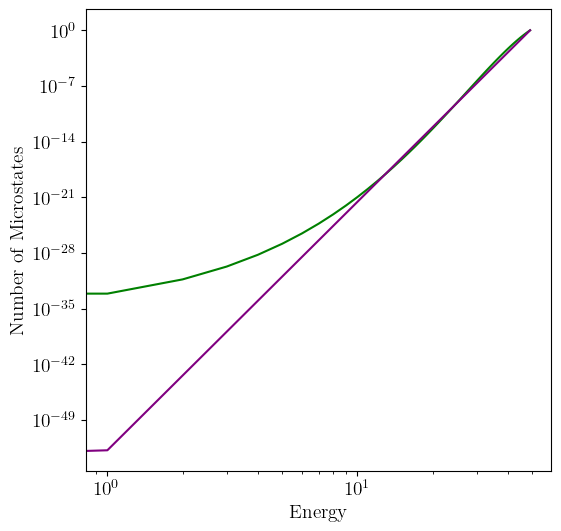

In [246]:
microstate_plotter(125, 50, 1)